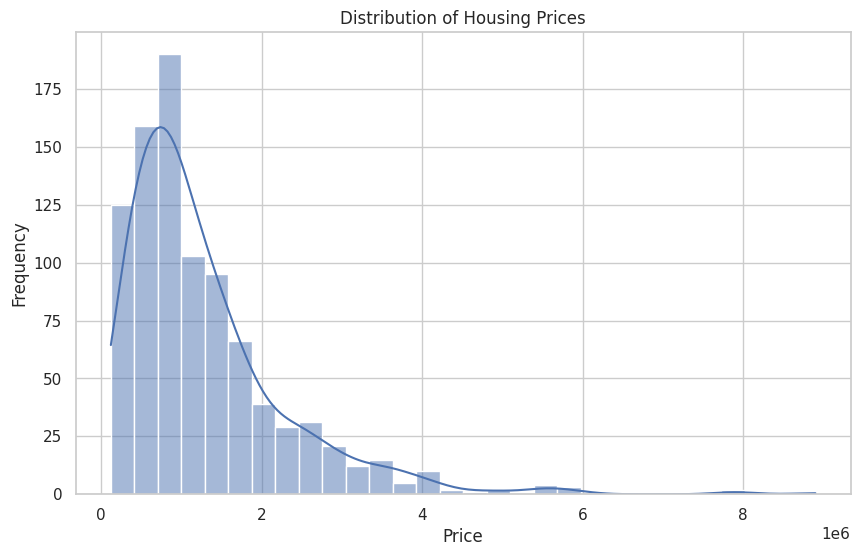

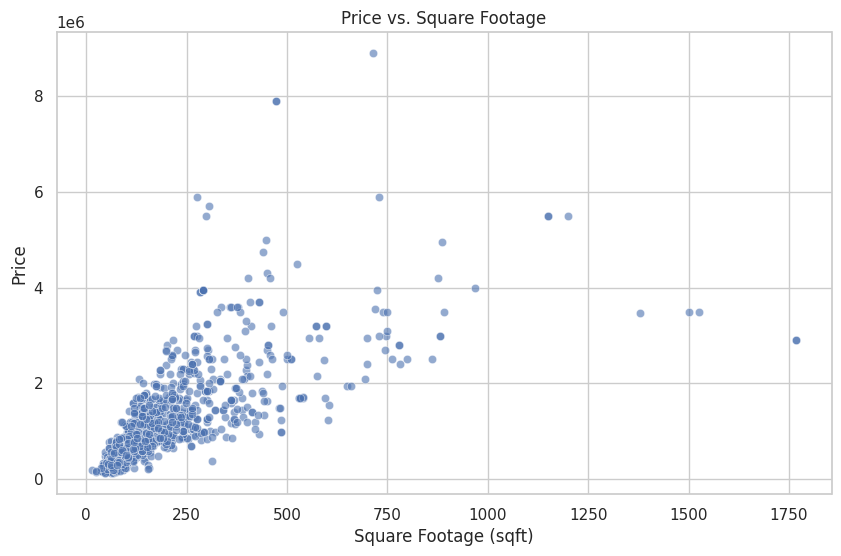

<IPython.core.display.Javascript object>

In [2]:
import zipfile
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install dash-bootstrap-components
import dash
from dash import dcc, html
import dash_bootstrap_components as dbc
import plotly.express as px

# Extract dataset
with zipfile.ZipFile('/content/archive (1).zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Load dataset
file_path = '/content/idealista_madrid.csv'
df = pd.read_csv(file_path)

# Data Cleaning
# Fill missing values
missing_columns = ['description', 'address', 'typology', 'advertiserProfessionalName', 'advertiserName']
df[missing_columns] = df[missing_columns].fillna('unknown')

# Replace 0 with NaN for specific columns
numeric_columns = ['price', 'baths', 'rooms', 'sqft']
df[numeric_columns] = df[numeric_columns].replace(0, np.nan)

# Fill missing numeric values with median
df['price'] = df['price'].fillna(df['price'].median())
df['baths'] = df['baths'].fillna(df['baths'].median())
df['rooms'] = df['rooms'].fillna(df['rooms'].median())
df['sqft'] = df['sqft'].fillna(df['sqft'].median())

# Remove rows with missing critical data
df.dropna(subset=['price', 'listingUrl'], inplace=True)

# Remove duplicates
df = df.drop_duplicates()

# Convert data types
df['price'] = df['price'].astype(float)
df['baths'] = df['baths'].astype(int)
df['rooms'] = df['rooms'].astype(int)
df['sqft'] = df['sqft'].astype(float)

# Save cleaned data
df.to_csv('/content/cleaned_housing_data.csv', index=False)

# Data Visualization
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sqft', y='price', alpha=0.6)
plt.title('Price vs. Square Footage')
plt.xlabel('Square Footage (sqft)')
plt.ylabel('Price')
plt.show()

# Dash App
# Create visualizations using Plotly Express
fig_price_distribution = px.histogram(df, x='price', nbins=30, title='Distribution of Housing Prices')
fig_price_sqft = px.scatter(df, x='sqft', y='price', title='Price vs. Square Footage')
avg_price_rooms = df.groupby('rooms')['price'].mean().reset_index()
fig_avg_price_rooms = px.bar(avg_price_rooms, x='rooms', y='price', title='Average Price by Number of Rooms')

# Customize colors and outlines
fig_price_distribution.update_traces(marker=dict(line=dict(color='black', width=1)))
fig_price_sqft.update_traces(marker=dict(line=dict(color='black', width=1)))
fig_avg_price_rooms.update_traces(marker=dict(line=dict(color='black', width=1)))

# Dash Layout
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
app.layout = dbc.Container(
    style={'backgroundColor': '#F5F5DC'},  # Beige background
    children=[
        dbc.Row([
            dbc.Col(html.H1("Madrid Housing Prices Dashboard", style={'textAlign': 'center', 'color': '#FF4500'}))
        ]),
        dbc.Row([
            dbc.Col(dcc.Graph(figure=fig_price_distribution), md=6),
            dbc.Col(dcc.Graph(figure=fig_price_sqft), md=6)
        ]),
        dbc.Row([
            dbc.Col(dcc.Graph(figure=fig_avg_price_rooms), md=12)
        ])
    ]
)

if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)
